# Project for integrate the libraries
## Extract

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'online_retail.csv'
data = pd.read_csv(path,encoding='latin')
#print(type(retail_data))
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [37]:
#iniciamos el analisis exploratorio de datos
print(data.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [38]:
print(data.describe())

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


## Trnasform

In [39]:
#Ya teniendo unos datos preliminares, buscamos cuantos datos tenemos faltantes o nulos

data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [40]:
#revisamos cuantos datos tenemos duplicados, para ya empezar a modelar el proceso de etl que definamos
data.duplicated().sum()

np.int64(5268)

In [41]:
unique_values = {col: data[col].unique() for col in data.columns}
for col,values in unique_values.items():
    print(f'Columna:{col}')
    print(f'Número de valores unicos:{len(values)}')
    print(f'Valores unicos:{values[:10]}')
    print('-' *50)
    
    

Columna:InvoiceNo
Número de valores unicos:25900
Valores unicos:['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------
Columna:StockCode
Número de valores unicos:4070
Valores unicos:['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------
Columna:Description
Número de valores unicos:4224
Valores unicos:['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------
Columna:Quantity
Número de valores unicos:722
Valores unicos:[ 6  8  2 32  3  4 24 12 48 18]
--------------------------------------------------
Columna:In

In [42]:
#borramos duplicados y almacenamos en una variable
data_cleaned = data.drop_duplicates()
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [43]:
#Verificamos que este correcta la limpieza
data_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [44]:
data_cleaned.duplicated().sum()

np.int64(0)

In [45]:
data_cleaned.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [46]:
#creamos una nueva columna de monto total
data_cleaned['TotalAmount'] = data_cleaned['Quantity']*data_cleaned['UnitPrice']
data_cleaned.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [47]:
#convertimos la columna InvoiceDate a una serie de tiempo datetime con ayuda de pandas ya que estaba en tipo object, verificamos el cambio
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])


In [48]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [49]:
#creamos nuevas columnas con año y mes para dar un mejor manejo, esto lo hacemos con pandas
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [50]:
#creamos una variable que me almacene la suma del monto total por la columna año que hemos creado anteriormente e imprimimos el resultado
sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum()
sales_by_year


Year
2010     552372.860
2011    7726146.564
Name: TotalAmount, dtype: float64

In [51]:
#generamos un reporte semestral, para ello primero generamos una columna que nos diga el semestre
#con lambda function creamos la columna en un for que diga 1 para primer semestre o 2 segundo semestre
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x:1 if x<=6 else 2)

In [52]:
#creamos ahora si la variable que nos permite calcular las ventas por semestre
sales_by_semester =data_cleaned.groupby(['Year','Semester'])['TotalAmount'].sum()
sales_by_semester

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

### ¿Caules son las ventas trimestrales y mensuales?

In [53]:
#creamos una columna para los trimestres
data_cleaned['Trimester'] = data_cleaned['Month'].apply(lambda x: 'T1' if x <= 3 else 'T2' if x <= 6 else 'T3' if x <= 9 else 'T4')
sales_by_trimester = data_cleaned.groupby(['Year','Trimester'])['TotalAmount'].sum()
sales_by_trimester


Year  Trimester
2010  T4            552372.860
2011  T1           1487842.180
      T2           1679096.861
      T3           2117546.643
      T4           2441660.880
Name: TotalAmount, dtype: float64

In [54]:
#Para generar un reporte mensual no debemos crear mas columnas solo variable para almacenar la operacion
sales_by_month = data_cleaned.groupby(['Year','Month'])['TotalAmount'].sum()
sales_by_month


Year  Month
2010  12        552372.860
2011  1         473731.900
      2         435534.070
      3         578576.210
      4         425222.671
      5         647011.670
      6         606862.520
      7         573112.321
      8         615078.090
      9         929356.232
      10        973306.380
      11       1126815.070
      12        341539.430
Name: TotalAmount, dtype: float64

In [55]:
data_cleaned.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,Trimester
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,T4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,T4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,T4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,T4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,T4


### Vamos a contar el numero de ventas que han tenido devolución

In [56]:
total_returns = data_cleaned[data_cleaned['Quantity'] < 0].shape[0]
total_returns

8872

In [57]:
total_non_returns = data_cleaned[data_cleaned['Quantity'] >= 1].shape[0]
total_non_returns

392732

# Load

## visualization of data
La importancia de la graficación de resultados en un proyecto de análisis de datos:

* Facilita la comprensión: Los gráficos permiten visualizar patrones, tendencias y relaciones en los datos de manera clara y directa.
* Comunicación efectiva: Transmiten hallazgos clave de forma rápida y accesible.
* Identificación de patrones: Los gráficos ayudan a detectar correlaciones, anomalías y agrupamientos que podrían pasar desapercibidos en tablas.
* Comparación de datos: Facilita la comparación entre diferentes variables, categorías o periodos de tiempo.
* Detección de valores atípicos: Gráficos como Boxplot o Scatterplot son útiles para identificar datos anómalos.
* Soporte visual para argumentación: El uso de gráficos refuerza las conclusiones del análisis con representaciones visuales, proporcionando evidencia solida a la hora de respaldar decisiones.

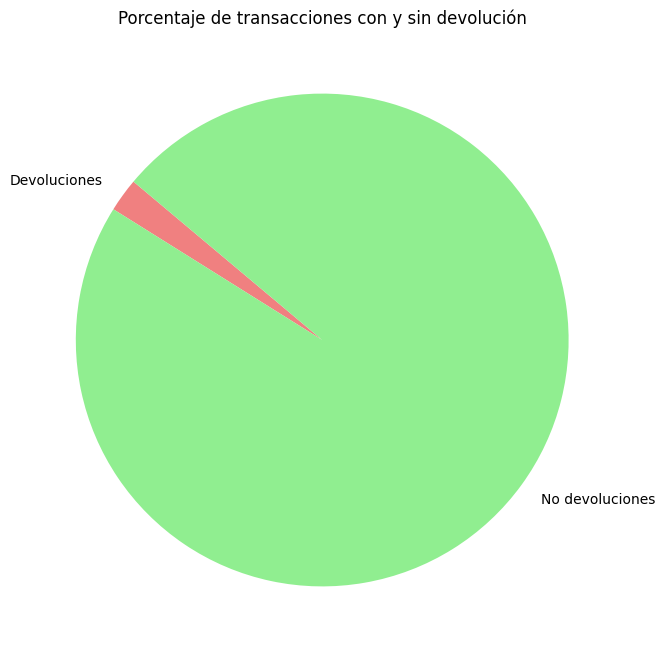

In [60]:
labels = ['Devoluciones', 'No devoluciones']
sizes = [total_returns, total_non_returns]
colors = ['lightcoral','lightgreen']
plt.figure(figsize = (8,8))
plt.pie(sizes,labels = labels, startangle = 140, colors = colors)
plt.title('Porcentaje de transacciones con y sin devolución')
plt.show()

In [80]:
 #creamos una columna categorica basada en el monto total de la transacción (ejemplo: 'Low', 'Medium', 'High')
def categorize_total_amount(amount):
     if amount <15:
         return 'Low'
     elif 15 >= amount < 100:
         return 'Medium'
     else:
         return 'High'
data_cleaned['AmountCategory'] = data_cleaned['TotalAmount'].apply(categorize_total_amount)

#mostrar las primeras filas con las nuevas columnas

print(data_cleaned.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalAmount  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom        15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom        22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom        20.34   

   Year  Month  Semester Trimester AmountCategory  
0  2010     12         2        T4           High  


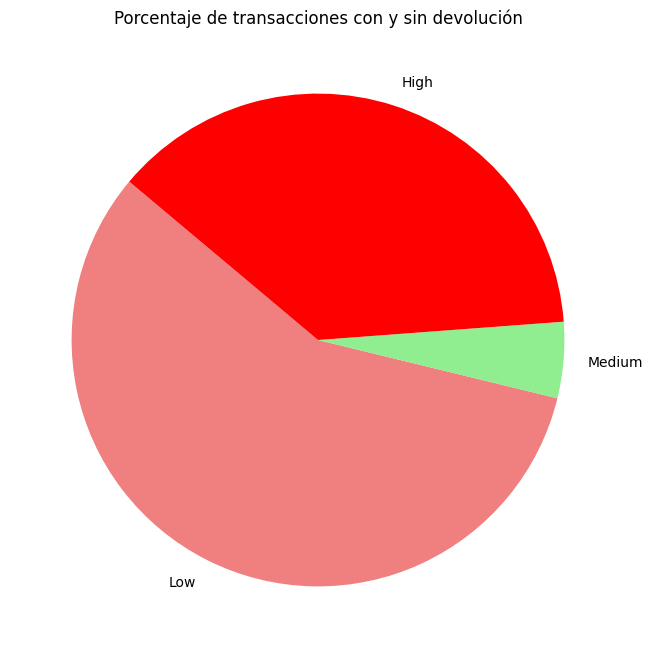

In [81]:
amount_category_low = (data_cleaned['AmountCategory'] == 'Low').sum()
amount_category_medium = (data_cleaned['AmountCategory'] == 'Medium').sum()
amount_category_high = (data_cleaned['AmountCategory'] == 'High').sum()

labels = ['Low', 'Medium', 'High']
sizes = [amount_category_low,amount_category_medium,amount_category_high]
colors = ['lightcoral','lightgreen','red']
plt.figure(figsize = (8,8))
plt.pie(sizes,labels = labels, startangle = 140, colors = colors)
plt.title('Porcentaje de transacciones con y sin devolución')
plt.show()

## Graficar la distribución de ventas por mes y año

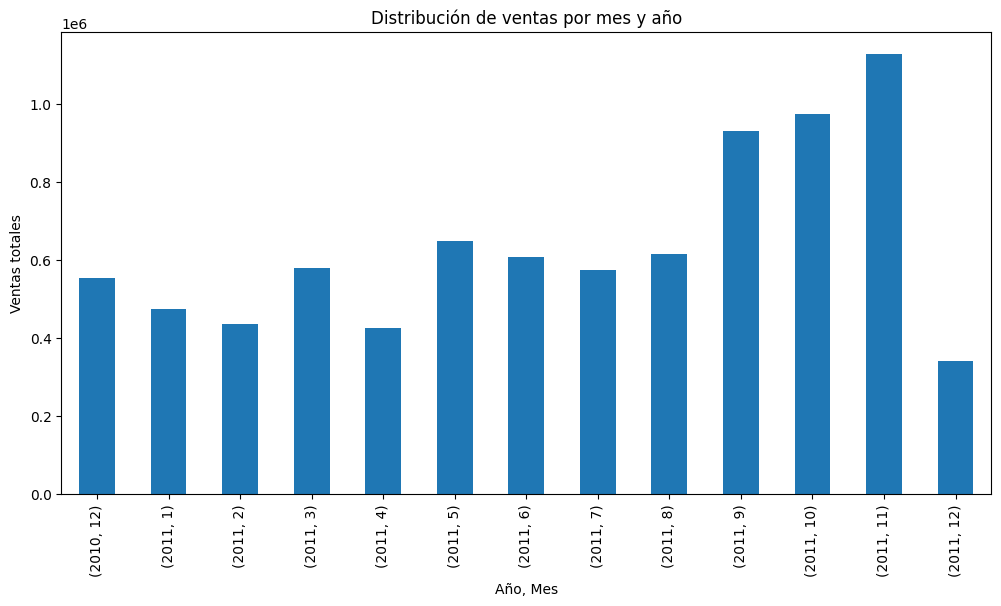

In [84]:
plt.figure(figsize=(12,6))
data_cleaned.groupby(['Year','Month'])['TotalAmount'].sum().plot(kind='bar')
plt.xlabel('Año, Mes')
plt.ylabel('Ventas totales')
plt.title('Distribución de ventas por mes y año')
plt.show()


## Graficar el top 10 de productos mas vendidos

In [ ]:
#generamos en una variable la cantidad vendida por el stockcode para identificar los productos y luego concatenamos el stockcode con
#la descripcion para ser mas entendible en la referencia del producto, eliminamos duplicados para agrupar
top_products = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending = False).head(10)
top_products = top_products.reset_index()
top_products = pd.merge(top_products, data_cleaned[['StockCode', 'Description']].drop_duplicates(),
                        on='StockCode', how='left')



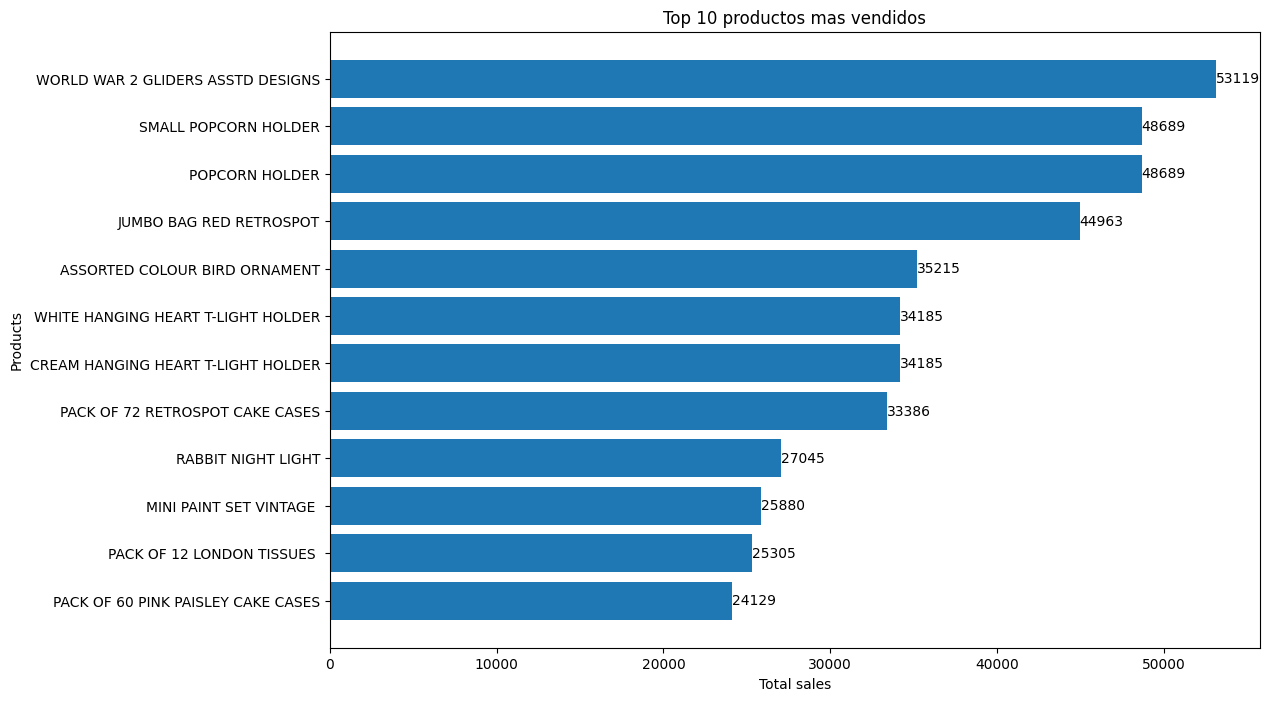

In [95]:
#contruimos la grafica
plt.figure(figsize=(12,8))

plt.barh(top_products['Description'],top_products['Quantity'])
plt.ylabel('Products')
plt.xlabel('Total sales')
plt.title('Top 10 productos mas vendidos')
plt.gca().invert_yaxis() #invertimos para que se muestre de manera descendente

#mostrar los valores en cada barra
for index, value in enumerate(top_products['Quantity']):
    plt.text(value,index, str(value), va='center') #va para alinear verticalmente al centro
plt.show()